<a href="https://colab.research.google.com/github/imemmul/TensorFlow-Notes/blob/main/Natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2022-09-05 21:38:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-09-05 21:38:47 (76.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-09-05 21:38:52--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.213.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.213.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2022-09-05 21:38:52 (84.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
unzip_data("nlp_getting_started.zip")

### Visualizing a text dataset

In [5]:
import pandas as pd

In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
len(train_df)

7613

In [10]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real_disaster)" if target > 0 else "(not_real_disaster")
  print(f"Text: \n{text}\n")
  print("---\n")

Target: 1 (real_disaster)
Text: 
Cop pulls drunk driver to safety SECONDS before his car is hit by train. http://t.co/F1BAkpNyn6åÊ http://t.co/lZXwoAyE4x via @ViralSpell

---

Target: 1 (real_disaster)
Text: 
8/6/2015@2:09 PM: TRAFFIC ACCIDENT NO INJURY at 2781 WILLIS FOREMAN RD http://t.co/VCkIT6EDEv

---

Target: 0 (not_real_disaster
Text: 
#Eyewitness media is actively embraced by #UK audiences. Read the report by @emhub on the impact of #UGC in news: http://t.co/6mBPvwiTxf

---

Target: 0 (not_real_disaster
Text: 
@newyorkcity for the #international emergency medicine conference w/ Lennox Hill hospital and #drjustinmazur

---

Target: 0 (not_real_disaster
Text: 
@KamKasteIIano @BluntedJayt FUCKING SCREAMING !

---



### Splitting data into and validation sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [13]:
len(train_sentences), len(train_labels), len(val_sentences)

(6851, 6851, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

In [15]:
max = 0
index = 0
for i in range(len(train_sentences)):
  if len(train_sentences[i].split()) > max:
    max = len(train_sentences[i].split())
    index = i
max, index

(31, 318)

In [16]:
len(train_sentences[318].split())

31

### Text Vectorization(tokenization)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [18]:
text_vectorizer = TextVectorization(max_tokens=10000,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None,
                                    pad_to_max_tokens=True)

In [19]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [20]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [21]:
# Fitting the text vectorizer

text_vectorizer.adapt(train_sentences)

In [22]:
sample_sent = "I a fire in next building!"
text_vectorizer([sample_sent])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  8,   3,  42,   4, 274, 630,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [23]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"org text : \n {random_sentence} \
\n\n Vectorized:\n")
text_vectorizer([random_sentence])

org text : 
 my dad said I look thinner than usual but really im over here like http://t.co/bnwyGx6luh 

 Vectorized:



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  13, 1419,  205,    8,  173, 7613,   76, 2238,   30,  169,   32,
          60,  140,   25,    1]])>

In [24]:
words_in_vocabs = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocabs[:5]
bottom_5_words = words_in_vocabs[-5:]
print(f"top 5: \n {top_5_words}")
print(f"bottom5: \n {bottom_5_words}")

top 5: 
 ['', '[UNK]', 'the', 'a', 'in']
bottom5: 
 ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating and embedding using embedding layer

In [25]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)
embedding

In [26]:
embedding.weights

[]

In [27]:
random_sentence = random.choice(train_sentences)
print(f"org text:\n {random_sentence} \n Embedded: \n")
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

org text:
 @Truly_Stings Yo Dm me 
 Embedded: 



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02637935,  0.03076467, -0.00920336, ...,  0.02003722,
          0.00780179,  0.03211835],
        [-0.04255436, -0.01836196,  0.02294022, ...,  0.03188093,
          0.03168019,  0.00072179],
        [-0.03463379, -0.04038336,  0.03605736, ...,  0.04832533,
         -0.03103378, -0.04695522],
        ...,
        [-0.01916022,  0.04979746, -0.04412174, ..., -0.00095732,
         -0.03123637, -0.01043388],
        [-0.01916022,  0.04979746, -0.04412174, ..., -0.00095732,
         -0.03123637, -0.01043388],
        [-0.01916022,  0.04979746, -0.04412174, ..., -0.00095732,
         -0.03123637, -0.01043388]]], dtype=float32)>

In [28]:
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.02637935,  0.03076467, -0.00920336,  0.01652369, -0.01008498,
         0.03354618, -0.0076627 ,  0.03583753, -0.03020471,  0.01947698,
        -0.03184444,  0.04416707, -0.04990773,  0.01507099,  0.0462938 ,
         0.01306805, -0.02308927,  0.03624294,  0.03995099,  0.01229936,
        -0.04459077,  0.0421536 ,  0.02875472,  0.01088806, -0.00825178,
        -0.02115836, -0.02537465, -0.03496982,  0.03837098, -0.01173524,
        -0.03887664, -0.01549481, -0.0409598 , -0.01033933, -0.0420014 ,
         0.01739554, -0.00441007, -0.04058722,  0.00773937, -0.02184555,
         0.00998273,  0.02994529, -0.02797326, -0.01984324,  0.03624148,
         0.03553523, -0.0118397 , -0.02107129,  0.03493995,  0.00968755,
         0.03347364,  0.0226307 ,  0.00716058, -0.04265112, -0.03628762,
         0.0408986 , -0.00831884, -0.03784619,  0.03034535,  0.03949788,
         0.0417452 ,  0.00045977, -0.04692046,  0.03927585, -0.0431823 ,
  

### Modelling experiments and tutorial

* Model 0 : Naive Bayes
* Model 1 : Dense model
* Model 2 : LSTM model
* Model 3 : GRU model
* Model 4 : Bidirectional-LTSM
* Model 5 : 1D CNN
* Model 6 : TF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [30]:
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [31]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score * 100

79.26509186351706

In [32]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [34]:
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [35]:
baseline_results = calculate_results(val_labels, baseline_preds)

### Model 1 : Dense model

In [36]:
from helper_functions import create_tensorboard_callback
LOG_DIR = "model_logs"

In [37]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [38]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [39]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [40]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=LOG_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20220905-213855
Epoch 1/5
215/215 [==============================] - 7s 24ms/step - loss: 0.6125 - accuracy: 0.6993 - val_loss: 0.5377 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.4426 - accuracy: 0.8165 - val_loss: 0.4714 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.3482 - accuracy: 0.8625 - val_loss: 0.4581 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2851 - accuracy: 0.8886 - val_loss: 0.4644 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2390 - accuracy: 0.9108 - val_loss: 0.4789 - val_accuracy: 0.7835


In [41]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4789 - accuracy: 0.7835


[0.4788845181465149, 0.7834645509719849]

In [42]:
model_1_pred_probs = model_1.predict(val_sentences)

In [43]:
model_1_pred_probs[:10]

array([[0.3698033 ],
       [0.7723739 ],
       [0.99734485],
       [0.15383598],
       [0.09724629],
       [0.95130086],
       [0.89650536],
       [0.992517  ],
       [0.9616878 ],
       [0.33709744]], dtype=float32)

In [44]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))

In [45]:
model_1_preds.shape

TensorShape([762])

In [46]:
model_1_results = calculate_results(val_labels,
                                    model_1_preds)
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7872123378365872,
 'recall': 0.7834645669291339,
 'f1': 0.7807800582578167}

In [47]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [48]:
words_in_vocabs

['',
 '[UNK]',
 'the',
 'a',
 'in',
 'to',
 'of',
 'and',
 'i',
 'is',
 'for',
 'on',
 'you',
 'my',
 'with',
 'it',
 'that',
 'at',
 'by',
 'this',
 'from',
 'be',
 'are',
 'was',
 'have',
 'like',
 'as',
 'up',
 'so',
 'just',
 'but',
 'me',
 'im',
 'your',
 'not',
 'amp',
 'out',
 'its',
 'will',
 'an',
 'no',
 'has',
 'fire',
 'after',
 'all',
 'when',
 'we',
 'if',
 'now',
 'via',
 'new',
 'more',
 'get',
 'or',
 'about',
 'what',
 'he',
 'people',
 'news',
 'been',
 'over',
 'one',
 'how',
 'dont',
 'they',
 'who',
 'into',
 'were',
 'do',
 'us',
 '2',
 'can',
 'video',
 'emergency',
 'there',
 'disaster',
 'than',
 'police',
 'would',
 'his',
 'still',
 'her',
 'some',
 'body',
 'storm',
 'crash',
 'burning',
 'suicide',
 'back',
 'man',
 'california',
 'why',
 'time',
 'them',
 'had',
 'buildings',
 'rt',
 'first',
 'cant',
 'see',
 'got',
 'day',
 'off',
 'our',
 'going',
 'nuclear',
 'know',
 'world',
 'bomb',
 'fires',
 'love',
 'killed',
 'go',
 'attack',
 'youtube',
 'dead

In [49]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [50]:
embedd_weights = model_1.get_layer(name="embedding")

In [51]:
embed_weights = embedd_weights.get_weights()[0]


In [52]:
embed_weights.shape

(10000, 128)

In [53]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocabs):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

"LSTM = long short memory"

### Model 2 building

In [54]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(units=64, return_sequences=True)(x)
#print(x.shape)
x = layers.LSTM(64)(x)
# x = layers.GlobalAveragePooling1D()(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
# x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
#print(outputs.shape)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [55]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [56]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [57]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=LOG_DIR,
                                                                     experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220905-213924
Epoch 1/5
215/215 [==============================] - 8s 27ms/step - loss: 0.2213 - accuracy: 0.9221 - val_loss: 0.5913 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.1571 - accuracy: 0.9410 - val_loss: 0.6805 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.1271 - accuracy: 0.9523 - val_loss: 0.7794 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1019 - accuracy: 0.9593 - val_loss: 0.7377 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0819 - accuracy: 0.9679 - val_loss: 0.9096 - val_accuracy: 0.7756


In [58]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[1.6006193e-01],
       [8.2588732e-01],
       [9.9963486e-01],
       [7.8778863e-02],
       [5.5959821e-04],
       [9.9457783e-01],
       [7.6504457e-01],
       [9.9973035e-01],
       [9.9944472e-01],
       [3.6215478e-01]], dtype=float32)

In [59]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))

In [60]:
model_2_results = calculate_results(val_labels,
                                    model_2_preds)

In [61]:
model_2_results

{'accuracy': 77.55905511811024,
 'precision': 0.7772070861555818,
 'recall': 0.7755905511811023,
 'f1': 0.7736182129212565}

In [62]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3 building
Gonna use tf.keras.layers.GRU

In [63]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.LSTM(64)(x)
# x = layers.GRU(64, return_sequences=True)(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid", name="mdoel_3_output_layer")(x)
model_3 = tf.keras.Model(inputs, outputs)

In [64]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 mdoel_3_output_layer (Dense  (None, 1)                65        
 )                                                               
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-train

In [65]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [66]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              validation_data=(val_sentences, val_labels),
                              epochs=5,
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220905-214008
Epoch 1/5
215/215 [==============================] - 8s 27ms/step - loss: 0.1599 - accuracy: 0.9377 - val_loss: 0.7588 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0826 - accuracy: 0.9689 - val_loss: 0.7197 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0711 - accuracy: 0.9711 - val_loss: 0.9058 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0583 - accuracy: 0.9750 - val_loss: 1.1609 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0498 - accuracy: 0.9783 - val_loss: 1.2100 - val_accuracy: 0.7664


In [67]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs

array([[9.96530712e-01],
       [7.25354731e-01],
       [9.99792457e-01],
       [1.48405015e-01],
       [8.58483327e-05],
       [9.99591827e-01],
       [9.18027759e-01],
       [9.99842525e-01],
       [9.99796391e-01],
       [8.32069099e-01],
       [4.62681055e-04],
       [9.84692574e-01],
       [1.72197819e-04],
       [2.55450010e-01],
       [1.02780323e-04],
       [1.20466948e-03],
       [6.56843185e-04],
       [2.81393528e-04],
       [2.69589067e-01],
       [9.99688327e-01],
       [9.99965191e-01],
       [6.34407988e-05],
       [9.99647081e-01],
       [3.97565961e-03],
       [9.99865115e-01],
       [9.99845862e-01],
       [6.47097826e-04],
       [1.31723285e-03],
       [3.74996662e-03],
       [2.42819995e-01],
       [9.98262644e-01],
       [5.76704741e-04],
       [1.00296438e-02],
       [2.93225050e-03],
       [9.72097993e-01],
       [1.48408026e-01],
       [9.99504745e-01],
       [3.99814337e-01],
       [9.84314382e-02],
       [9.99899805e-01],


In [68]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))

In [69]:
model_3_results = calculate_results(val_labels,
                                    model_3_preds)
model_3_results

{'accuracy': 76.64041994750657,
 'precision': 0.7661489682210776,
 'recall': 0.7664041994750657,
 'f1': 0.7662288382234984}

### Model 4 building

In [70]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs ,outputs, name="model_4_bidirectinal")

In [71]:
model_4.summary()

Model: "model_4_bidirectinal"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,37

In [72]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [73]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220905-214038
Epoch 1/5
215/215 [==============================] - 12s 38ms/step - loss: 0.1065 - accuracy: 0.9693 - val_loss: 0.9646 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 10s 48ms/step - loss: 0.0549 - accuracy: 0.9769 - val_loss: 1.2041 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 9s 40ms/step - loss: 0.0459 - accuracy: 0.9781 - val_loss: 1.2073 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0411 - accuracy: 0.9807 - val_loss: 1.4235 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0447 - accuracy: 0.9804 - val_loss: 1.2987 - val_accuracy: 0.7703


In [74]:
model_4_pred_probs = model_4.predict(val_sentences)

In [75]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [76]:
model_4_results = calculate_results(val_labels,
                                    model_4_preds)

In [77]:
model_4_results, baseline_results

({'accuracy': 77.03412073490814,
  'precision': 0.7702878929185921,
  'recall': 0.7703412073490814,
  'f1': 0.769333028556703},
 {'accuracy': 79.26509186351706,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'f1': 0.7862189758049549})

### Model 5 building

In [78]:
embedding_test = embedding(text_vectorizer(["this is test"]))
conv1d = layers.Conv1D(filters=32,
                       kernel_size=5,
                       strides=1,
                       activation="relu",
                       padding="same")
output = conv1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(output)

embedding_test.shape, output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [79]:
inputs = layers.Input(shape=(1, ), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
print(outputs.shape)
model_5 = tf.keras.Model(inputs, outputs)

(None, 1)


In [80]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [81]:
model_5.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 1)                 65  

In [82]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20220905-214205
Epoch 1/5
215/215 [==============================] - 5s 19ms/step - loss: 0.1207 - accuracy: 0.9616 - val_loss: 0.9400 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0742 - accuracy: 0.9734 - val_loss: 1.0511 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0599 - accuracy: 0.9774 - val_loss: 1.1758 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0541 - accuracy: 0.9777 - val_loss: 1.2420 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0537 - accuracy: 0.9774 - val_loss: 1.2485 - val_accuracy: 0.7598


In [83]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [84]:
model_5_results = calculate_results(val_labels,
                                    model_5_preds)

In [85]:
model_5_results

{'accuracy': 75.98425196850394,
 'precision': 0.7610616087083465,
 'recall': 0.7598425196850394,
 'f1': 0.7577317717227482}

## Model 6 building

In [86]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [87]:
sample_sentence = "There is a flood in my street!"

In [88]:
embed_samples = embed([sample_sentence,
                      "When you can the universal sentence encoder on a sentence, it turns it into numbers."])

In [89]:
print(embed_samples.shape)

(2, 512)


In [90]:
print(embed_samples[0][:50])

tf.Tensor(
[-0.01602833  0.01068852  0.02425469 -0.01405768  0.01434427  0.08292625
  0.01963371  0.06160141 -0.00352697 -0.01216412  0.00978647 -0.01248495
  0.01232345  0.09748449  0.06141113 -0.03728353  0.01860886 -0.04669856
  0.00413911 -0.06363907 -0.024699    0.0271369   0.02284443 -0.00210027
 -0.00630594 -0.03964962  0.02220404  0.00115079 -0.03132173  0.00119527
 -0.04012547  0.04561891 -0.015306   -0.00175918  0.02173132 -0.08450423
  0.03340025  0.04604552 -0.02480248 -0.08681665  0.00702694 -0.0077048
 -0.01434541  0.07814164 -0.10676056 -0.05152994 -0.00858157 -0.03232231
 -0.03871097  0.02581466], shape=(50,), dtype=float32)


In [91]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [92]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="model_6_USE")
])

In [93]:
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

In [94]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 model_6_USE (Dense)         (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [95]:
model_6_history = model_6_history = model_6.fit(train_sentences,
                                                train_labels,
                                                epochs=5,
                                                validation_data=(val_sentences, val_labels),
                                                callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                                      "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20220905-214247
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.5062 - accuracy: 0.7815 - val_loss: 0.4481 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4140 - accuracy: 0.8168 - val_loss: 0.4378 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4019 - accuracy: 0.8216 - val_loss: 0.4341 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3933 - accuracy: 0.8263 - val_loss: 0.4299 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3877 - accuracy: 0.8288 - val_loss: 0.4277 - val_accuracy: 0.8123


In [96]:
model_6_pred_probs = model_6.predict(val_sentences)

In [97]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [98]:
model_6_results = calculate_results(val_labels,
                                    model_6_preds)
model_6_results, baseline_results

({'accuracy': 81.23359580052494,
  'precision': 0.8152105639975652,
  'recall': 0.8123359580052494,
  'f1': 0.8105808468856647},
 {'accuracy': 79.26509186351706,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706,
  'f1': 0.7862189758049549})

### Model 7 building

In [99]:
train_10 = train_df_shuffled[["text","target"]].sample(frac=0.1, random_state=42)
train_sentences_10 = train_10["text"].to_list()
train_labels_10 = train_10["target"].to_list()
len(train_labels_10), len(train_sentences_10)

(761, 761)

In [100]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="model_6_USE")
])
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_7_history = model_7.fit(train_sentences_10,
                              train_labels_10,
                              validation_data=(val_sentences, val_labels),
                              epochs=5,
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_7_10_percent")])

Saving TensorBoard log files to: model_logs/model_7_10_percent/20220905-214302
Epoch 1/5
24/24 [==============================] - 2s 40ms/step - loss: 0.6648 - accuracy: 0.6991 - val_loss: 0.6254 - val_accuracy: 0.8058
Epoch 2/5
24/24 [==============================] - 0s 20ms/step - loss: 0.5936 - accuracy: 0.7884 - val_loss: 0.5485 - val_accuracy: 0.8005
Epoch 3/5
24/24 [==============================] - 0s 20ms/step - loss: 0.5198 - accuracy: 0.7976 - val_loss: 0.4841 - val_accuracy: 0.8123
Epoch 4/5
24/24 [==============================] - 0s 20ms/step - loss: 0.4661 - accuracy: 0.8108 - val_loss: 0.4400 - val_accuracy: 0.8189
Epoch 5/5
24/24 [==============================] - 1s 23ms/step - loss: 0.4300 - accuracy: 0.8187 - val_loss: 0.4094 - val_accuracy: 0.8320


In [101]:
from sklearn.metrics import precision_score

In [102]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_results = calculate_results(val_labels,
                                    model_7_preds)
model_7_results

{'accuracy': 83.2020997375328,
 'precision': 0.8319037384708796,
 'recall': 0.8320209973753281,
 'f1': 0.8319393046078223}

In [103]:
precision_score(val_labels, model_7_preds)

0.8197674418604651

In [104]:
model_7_results

{'accuracy': 83.2020997375328,
 'precision': 0.8319037384708796,
 'recall': 0.8320209973753281,
 'f1': 0.8319393046078223}

In [105]:
model_6_results

{'accuracy': 81.23359580052494,
 'precision': 0.8152105639975652,
 'recall': 0.8123359580052494,
 'f1': 0.8105808468856647}

#### So up there while creating 10 percent data splits there is something called "data leakage".
While creating splits we also included validation data somehow so we have to fix that

In [106]:
import numpy as np

In [107]:
train_10_split = int(0.1 * len(train_sentences))
train_sentences_10_fixed = train_sentences[:train_10_split]
train_labels_10_fixed = train_labels[:train_10_split]

In [108]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [109]:
model_8 = tf.keras.Sequential([
    sentence_encoder_layer,
    #layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="model_8_USE")
])
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
model_8_history = model_8.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              validation_data=(val_sentences, val_labels),
                              epochs=5,
                              callbacks=[create_tensorboard_callback(LOG_DIR,
                                                                     "model_8_10_percent_fixed_split")])

Saving TensorBoard log files to: model_logs/model_8_10_percent_fixed_split/20220905-214307
Epoch 1/5
22/22 [==============================] - 2s 47ms/step - loss: 0.6662 - accuracy: 0.7157 - val_loss: 0.6448 - val_accuracy: 0.7244
Epoch 2/5
22/22 [==============================] - 1s 26ms/step - loss: 0.5897 - accuracy: 0.8105 - val_loss: 0.5891 - val_accuracy: 0.7454
Epoch 3/5
22/22 [==============================] - 1s 25ms/step - loss: 0.5154 - accuracy: 0.8207 - val_loss: 0.5376 - val_accuracy: 0.7612
Epoch 4/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4519 - accuracy: 0.8353 - val_loss: 0.5037 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4105 - accuracy: 0.8309 - val_loss: 0.4886 - val_accuracy: 0.7795


In [110]:
model_8_pred_probs = model_8.predict(val_sentences)
model_8_preds = tf.squeeze(tf.round(model_8_pred_probs))
model_8_results = calculate_results(y_true=val_labels,
                                    y_pred=model_8_preds)
model_8_results

{'accuracy': 77.95275590551181,
 'precision': 0.7825962002002497,
 'recall': 0.7795275590551181,
 'f1': 0.7770045099502749}

why model_8 calculation is so low ???

In [111]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "model_1": model_1_results,
                                  "model_2": model_2_results,
                                  "model_3": model_3_results,
                                  "model_4":model_4_results,
                                  "model_5":model_5_results,
                                  "model_6":model_6_results,
                                  "model_8":model_8_results})

In [112]:
all_model_results = all_model_results.transpose()

In [113]:
all_model_results["accuracy"] = all_model_results["accuracy"] / 100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
model_1,0.783465,0.787212,0.783465,0.780780
model_2,0.775591,0.777207,0.775591,0.773618
model_3,0.766404,0.766149,0.766404,0.766229
model_4,0.770341,0.770288,0.770341,0.769333
model_5,0.759843,0.761062,0.759843,0.757732
model_6,0.812336,0.815211,0.812336,0.810581
model_8,0.779528,0.782596,0.779528,0.777005


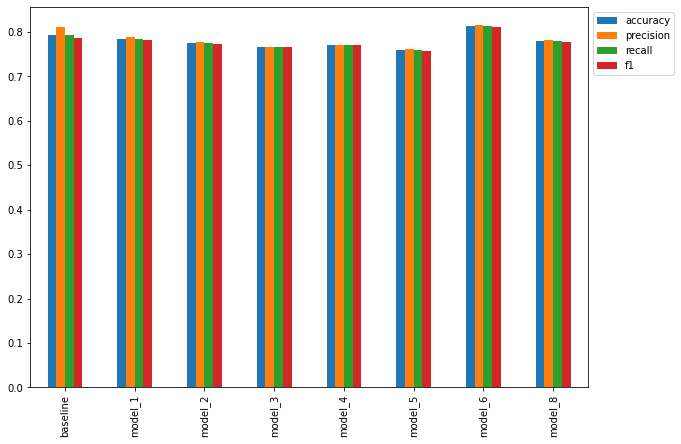

In [114]:
all_model_results.plot(kind="bar",
                       figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

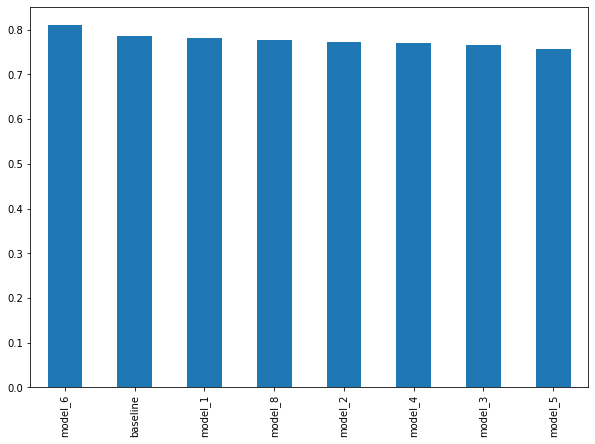

In [115]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar",
                                                                figsize=(10,7))

In [116]:
!tensorboard dev upload --logdir ./model_logs/ \
  --name "NLP modelling experiments of different models" \
  --one_shot

2022-09-05 21:46:13.187451: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg